# OCSMM-SHAP
## Handwritten letter recognition dataset

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

letters, y = fetch_openml("letter", version=1, return_X_y=True, parser="auto")

feature_names = letters.columns.tolist()
letters["group"] = y  # Add group labels (letters A-Z)

# Verify groups
print("Groups:", letters["group"].unique())  # ['A', 'B', ..., 'Z']
print("Samples per group:\n", letters["group"].value_counts())

Groups: ['Z', 'P', 'S', 'H', 'F', ..., 'T', 'C', 'G', 'B', 'J']
Length: 26
Categories (26, object): ['A', 'B', 'C', 'D', ..., 'W', 'X', 'Y', 'Z']
Samples per group:
 group
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


In [22]:
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,group
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10,5,8,3,4,10,7,8,12,10,9,2,9,2,6,C
19996,4,7,6,5,3,7,8,2,10,12,6,8,1,9,6,8,Z
19997,4,8,4,6,4,7,8,7,4,10,7,6,3,9,3,7,O
19998,4,11,4,8,3,0,2,4,6,1,0,7,0,8,0,8,L


In [23]:
grouped_data = []
for letter in sorted(letters["group"].unique()):  # A, B, ..., Z
    mask = letters["group"] == letter
    samples = letters[mask].drop("group", axis=1).values # Remove class column
    grouped_data.append(samples)

# Structure: grouped_data[0] = all "A" samples, grouped_data[1] = "B", etc.
print(f"Number of groups (letters): {len(grouped_data)}")  # 26
print(f"Samples per group (e.g., 'A'): {len(grouped_data[0])}")  # ~789-813
print(f"Features per sample: {len(grouped_data[0][0])}")  # 16

Number of groups (letters): 26
Samples per group (e.g., 'A'): 789
Features per sample: 16


In [24]:
datasets = grouped_data

In [25]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier
classifier = OneClassSMMClassifier(nu=0.2)
classifier.fit(datasets)

Best gamma found.

Kappa matrix calculated.

Found the alphas.



In [26]:
decision, y_pred  = classifier.predict(datasets)

Calculating kappa.

calculating rho.

0.29708013029360725


In [27]:
decision

array([ 3.20061916e-09,  3.53015425e-02, -1.34421300e-08,  4.90645662e-02,
        6.03256154e-02,  1.44308055e-02,  5.97431340e-02,  9.36674482e-02,
        4.97822555e-08, -1.44576157e-09,  7.88427010e-02,  2.49355669e-09,
       -5.42864803e-09,  5.46399199e-02,  5.65309542e-02, -1.54588132e-08,
        2.09990950e-02,  4.25786981e-02,  5.35675544e-02, -9.41833223e-09,
        2.21509647e-02, -4.42017078e-09,  1.96101124e-09,  1.02252380e-01,
        1.28293726e-09, -9.10652392e-09])

In [28]:
#  y_pred 

In [29]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[2, 9, 12, 15, 19, 21, 25]

In [ ]:
from src.explanation_algorithms.OCSMMSHAP_copy import KernelSHAPIQ

shapiq = KernelSHAPIQ(n=17, max_order=2)
interactions_per_group = shapiq.explain_single_group(
    group_data=datasets[2],
    X_train=datasets,  
    model=classifier,
    regularization=1e-6)
interactions_per_group.plot_force(feature_names=feature_names, show=True)





/home/swathi/micromamba/envs/py311/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(















In [31]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
# ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
# ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

In [32]:
# shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [33]:
import numpy as np
# np.save("shapley_values_letter_before.npy", shapley_values)

In [34]:
shapley_values = np.load("shapley_values_letter_before.npy")

In [35]:
shapley_values

array([[ 0.02542783, -0.02278917,  0.01442823,  0.00690667,  0.01515479,
         0.07085382,  0.00748935,  0.00712334, -0.15964916, -0.00798259,
         0.01380701,  0.05356248,  0.04377081,  0.00385262,  0.00433299,
         0.02716608,  0.01198745, -0.01068758,  0.02626773,  0.05524256,
         0.01988252,  0.04002472,  0.04154884,  0.01667628,  0.05285166,
         0.00216667],
       [ 0.0425923 , -0.02969242,  0.00593919, -0.00205143, -0.02935713,
         0.04837885, -0.01875539, -0.03579168,  0.05063315,  0.02365652,
         0.01548453,  0.07941132,  0.01556249,  0.01399939, -0.02268136,
         0.05064792, -0.05039218, -0.02904691,  0.03318317,  0.06404786,
         0.00188172,  0.06678835,  0.05512919,  0.01402561,  0.02831945,
        -0.0334323 ],
       [ 0.03630748, -0.02988395, -0.03469658, -0.02119396, -0.02782579,
         0.04522035, -0.03540938,  0.03618366, -0.05962723, -0.00132432,
         0.06104332,  0.01605292,  0.09616856,  0.03965012, -0.04603522,
       

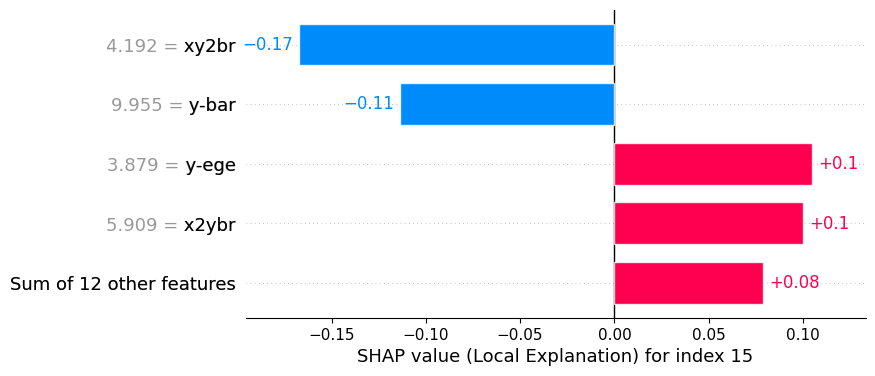

In [36]:
from src.utils.visualisation.deterministic_values import local_bar_plot_ocsmm, global_bar_plot_ocsmm
local_bar_plot_ocsmm(shapley_values.T, 15, feature_names=feature_names, datasets=datasets)

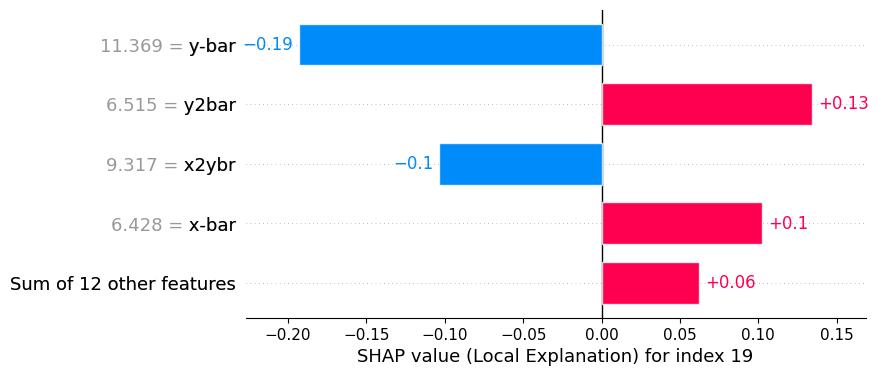

In [37]:
local_bar_plot_ocsmm(shapley_values.T, 19, feature_names=feature_names, datasets=datasets)

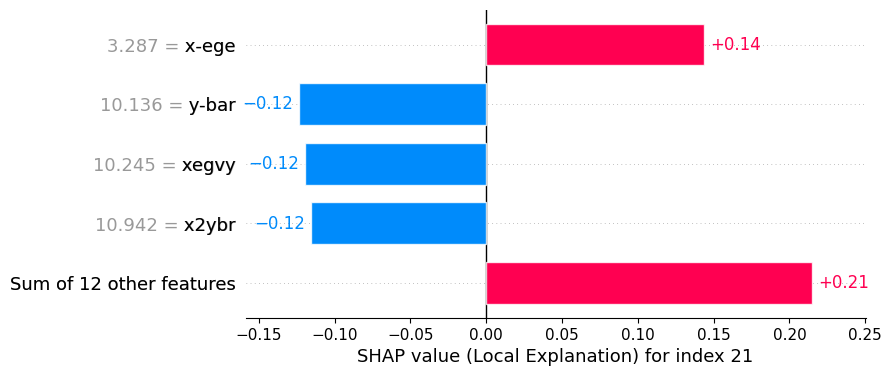

In [38]:
local_bar_plot_ocsmm(shapley_values.T, 21, feature_names=feature_names, datasets=datasets)

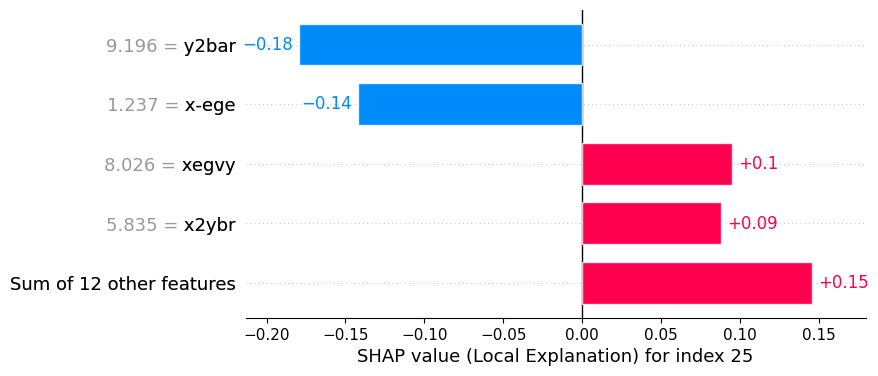

In [39]:
local_bar_plot_ocsmm(shapley_values.T, 25, feature_names=feature_names, datasets=datasets)

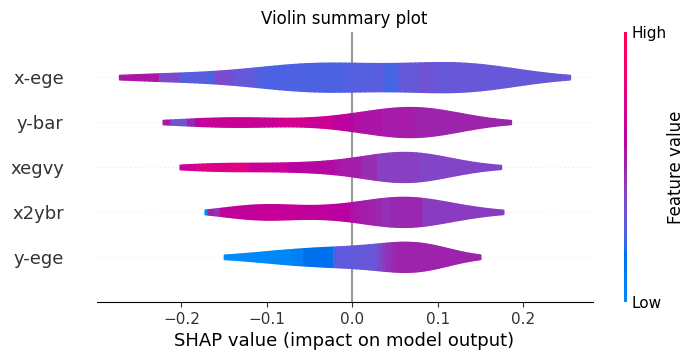

In [40]:
from src.utils.visualisation.deterministic_values import summary_plot_ocsmm
summary_plot_ocsmm(shapley_values=shapley_values.T, feature_names=feature_names, datasets=datasets)

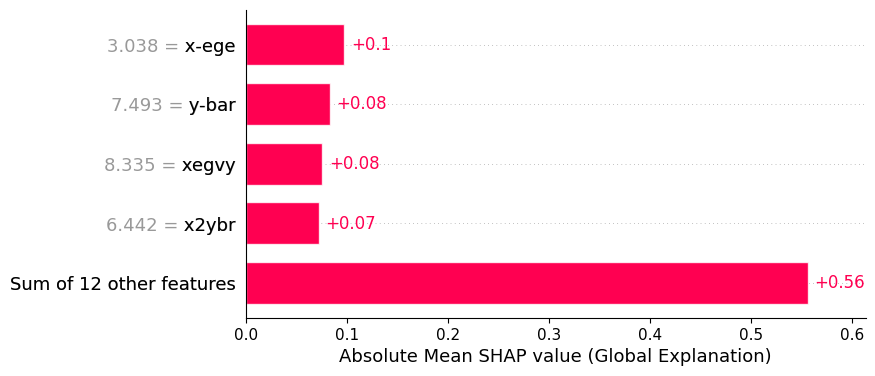

In [41]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot_ocsmm(mean_abs_shap_values, feature_names=feature_names, datasets=datasets)

In [17]:
a_group_idx = 0  # A=0, B=1, ..., P=15, ..., Z=25
for sample in grouped_data[a_group_idx]:
    sample[0] *= 2  # Perturb x-box (feature index 0)
    sample[3] *= 3  # Perturb high(feature index 3)

In [18]:
grouped_data[0]

array([[ 6, 11,  5, ...,  6,  4,  9],
       [ 8, 10,  6, ...,  7,  3,  8],
       [ 6,  5,  5, ...,  6,  3,  6],
       ...,
       [ 4,  7,  4, ...,  6,  2,  8],
       [ 4,  6,  3, ...,  6,  1,  8],
       [ 8, 11,  6, ...,  7,  1,  8]], shape=(789, 16))

In [19]:
classifier = OneClassSMMClassifier(nu=0.2)

In [20]:
classifier.fit(datasets)

Best gamma found.

Kappa matrix calculated.

Found the alphas.



In [21]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa.



calculating rho.

[1.81435191 2.28185973 2.2818598  2.28185975 2.28185981 2.28185959
 2.2818595  2.28185956 2.28185978 2.28185969]


ValueError: too many values to unpack (expected 2)

In [ ]:
decision

array([-0.42075701,  0.29206158,  0.04675082,  0.41368774,  0.32540932,
        0.11453393,  0.41863606,  0.5864757 ,  0.17030488,  0.04675089,
        0.5514888 ,  0.04675084,  0.0467509 ,  0.42992318,  0.47276157,
        0.04675068,  0.33633383,  0.3591712 ,  0.34241921,  0.04675059,
        0.24683142,  0.04675064,  0.04675087,  0.62114827,  0.10170226,
        0.04675078])

In [ ]:
y_pred

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[0]

In [ ]:
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

Calculating projections:   0%|          | 0/65535 [00:00<?, ?it/s]

Calculating projections: 100%|██████████| 65535/65535 [2:59:17<00:00,  6.09it/s]  


In [22]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [23]:
import numpy as np
np.save("shapley_values_letter_after.npy", shapley_values)

In [24]:
shapley_values = np.load("shapley_values_letter_after.npy")

In [26]:
from src.utils.visualisation.deterministic_values import local_bar_plot_ocsmm, global_bar_plot_ocsmm


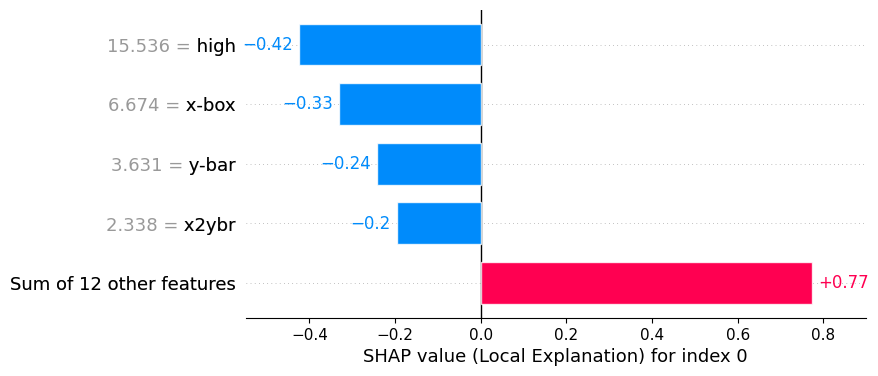

In [29]:
local_bar_plot_ocsmm(shapley_values.T, 0, feature_names=feature_names, datasets=datasets)

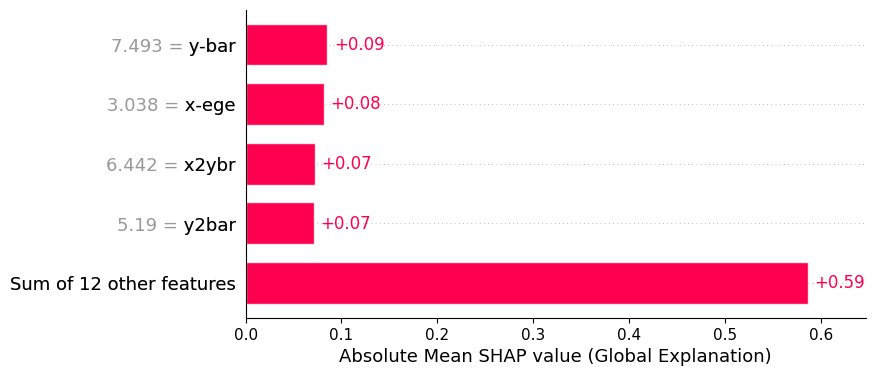

In [30]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot_ocsmm(mean_abs_shap_values, feature_names=feature_names, datasets=datasets)

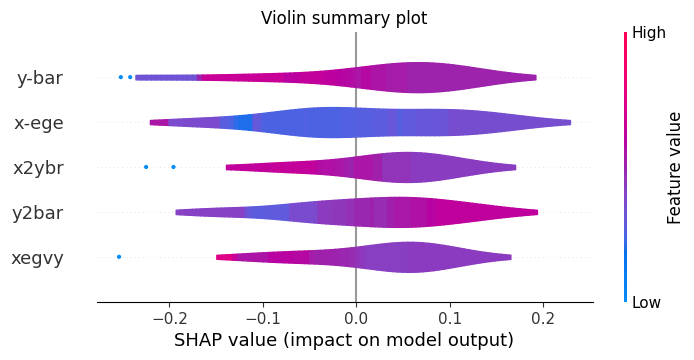

In [32]:
from src.utils.visualisation.deterministic_values import summary_plot_ocsmm
summary_plot_ocsmm(shapley_values=shapley_values.T, feature_names=feature_names, datasets=datasets)